### Importación de datos



In [5]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [13]:
#Importamos la biblioteca necesaria para insertar gráficos
import matplotlib.pyplot as plt

In [75]:
#Sumamos la facturación por tienda:
factura_1 = tienda["Precio"].sum()
factura_2 = tienda2["Precio"].sum()
factura_3 = tienda3["Precio"].sum()
factura_4 = tienda4["Precio"].sum()
print(f"La tienda 1 facturó: ${factura_1}")
print(f"La tienda 2 facturó: ${factura_2}")
print(f"La tienda 3 facturó: ${factura_3}")
print(f"La tienda 4 facturó: ${factura_4}")

La tienda 1 facturó: $1150880400.0
La tienda 2 facturó: $1116343500.0
La tienda 3 facturó: $1098019600.0
La tienda 4 facturó: $1038375700.0


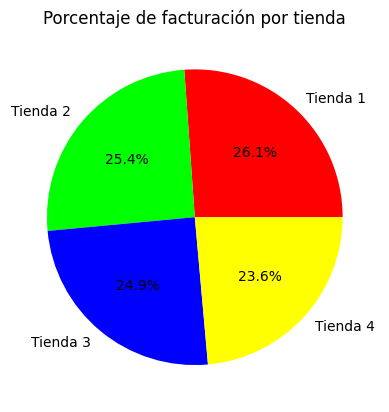

La tienda con menor facturación es la Tienda 4 con $1038375700.0
La tienda con mayor facturación es la Tienda 1 con $1150880400.0


In [78]:
#Comenzamos los códigos para nuestro gráfico
facturacion_total = [factura_1, factura_2, factura_3, factura_4]
tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
colores=["Red","#00FF00", "#0000FF", "#FFFF00"]

#Utilizamos un gráfico de barras simple, con el título, etiquetas y colores
plt.pie(facturacion_total, labels=tiendas, colors=colores, autopct="%1.1f%%")
plt.title("Porcentaje de facturación por tienda")
plt.show()

#Mostramos al usuario su mínimo y su máximo para el análisis
minimo = min(facturacion_total)
maximo = max(facturacion_total)
tienda_min = facturacion_total.index(minimo)
tienda_max = facturacion_total.index(maximo)
print(f"La tienda con menor facturación es la {tiendas[tienda_min]} con ${minimo}")
print(f"La tienda con mayor facturación es la {tiendas[tienda_max]} con ${maximo}")


# 2. Ventas por categoría

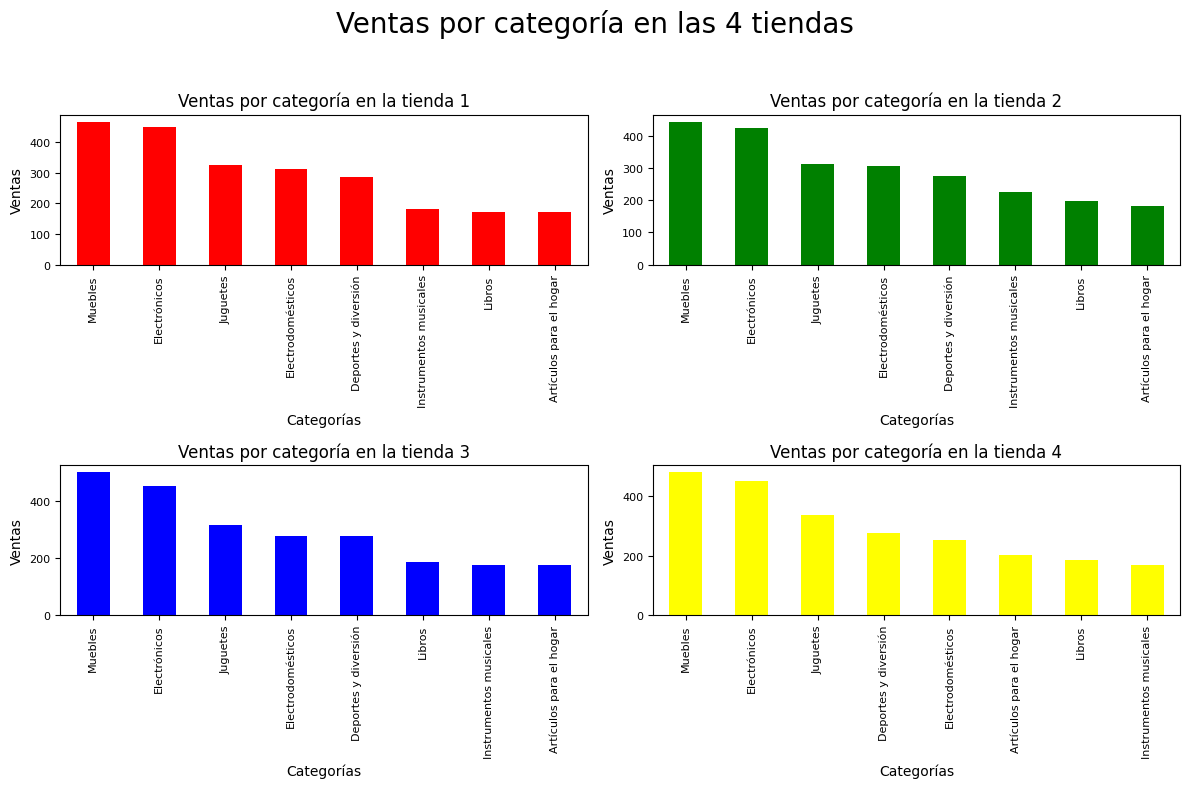

In [64]:
#Comenzamos el análisis por categoría
ventas_c_T1 = tienda["Categoría del Producto"].value_counts()
ventas_c_T2 = tienda2["Categoría del Producto"].value_counts()
ventas_c_T3 = tienda3["Categoría del Producto"].value_counts()
ventas_c_T4 = tienda4["Categoría del Producto"].value_counts()

#Ordenamos de mayor a menor cada tienda
sort_ventas_T1 = ventas_c_T1.sort_values(ascending=False)
sort_ventas_T2 = ventas_c_T2.sort_values(ascending=False)
sort_ventas_T3 = ventas_c_T3.sort_values(ascending=False)
sort_ventas_T4 = ventas_c_T4.sort_values(ascending=False)

#Insertamos gráficos para las categorías
#Iniciamos con una figura en la que veamos los 4 gráficos en formato
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Ventas por categoría en las 4 tiendas", fontsize=20)

#Gráfico para la tienda 1
sort_ventas_T1.plot(kind="bar",ax=axs[0,0], title="Ventas por categoría en la tienda 1", color="Red",fontsize=8)
axs[0,0].set_xlabel("Categorías")
axs[0,0].set_ylabel("Ventas")

#Grafico para la tienda 2
sort_ventas_T2.plot(kind="bar",ax=axs[0,1], title="Ventas por categoría en la tienda 2", color="Green",fontsize=8)
axs[0,1].set_xlabel("Categorías")
axs[0,1].set_ylabel("Ventas")

#Grafico para la tienda 3
sort_ventas_T3.plot(kind="bar",ax=axs[1,0], title="Ventas por categoría en la tienda 3", color="Blue",fontsize=8)
axs[1,0].set_xlabel("Categorías")
axs[1,0].set_ylabel("Ventas")

#Grafico para la tienda 4
sort_ventas_T4.plot(kind="bar",ax=axs[1,1], title="Ventas por categoría en la tienda 4", color="Yellow",fontsize=8)
axs[1,1].set_xlabel("Categorías")
axs[1,1].set_ylabel("Ventas")

#Evitamos que los gráficos se "encimen"
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()


# 3. Calificación promedio de la tienda


# 4. Productos más y menos vendidos

# 5. Envío promedio por tienda